<a href="https://colab.research.google.com/github/CiciWang1230/BHFinalProject/blob/main/BHFinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import math
import h5py

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"128de4248c745e040927ee558a9bcd62"} #this is my (Jack) API key btw

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

r = get(baseUrl)
r.keys()
names = [sim['name'] for sim in r['simulations']]

#defining the "sim" function for TNG100-1 alongside the "snaps" function
i = names.index('TNG300-1')
sim = get( r['simulations'][i]['url'])
snaps = get(sim['url'] + 'snapshots/')

In [2]:
#defining redshift values we are testing, etc
redshifts = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
sfrData = []
fractSubhalosUsed = 1.0

In [3]:
#Looping through all the snapshots to find the exact snapshots corresponding to the redshifts we're sampling
l=0
#redshifts with intervals of 0.5
snapz_00 = 0
snapz_05 = 0
snapz_10 = 0
snapz_15 = 0
snapz_20 = 0
snapz_25 = 0
snapz_30 = 0
snapz_35 = 0
snapz_40 = 0
snapz_45 = 0
snapz_50 = 0
snapz_55 = 0
snapz_60 = 0


#function for the ones in intervals of 0.5
while l < len(snaps):
  lval = float("{:.1f}".format(snaps[l]['redshift']))
  if lval == 0.0:
    snapz_00 = l
  elif lval == 0.5:
    snapz_05 = l
  elif lval == 1.0:
    snapz_10 = l
  elif lval == 1.5:
    snapz_15 = l
  elif lval == 2.0:
    snapz_20 = l
  #elif lval == 2.5:
    #snapz_25 = l
  elif lval == 3.0:
    snapz_30 = l
  elif lval == 3.5:
    snapz_35 = l
  elif lval == 4.0:
    snapz_40 = l
  #elif lval == 4.5:
    #snapz_45 = l
  elif lval == 5.0:
    snapz_50 = l
  elif lval == 5.5:
    snapz_55 = l
  elif lval == 6.0:
    snapz_60 = l
  l = l+1

snapz_25 = 29
snapz_45 = 19


snapzlist = [snapz_00, snapz_05, snapz_10, snapz_15, snapz_20, snapz_25, snapz_30, snapz_35, snapz_40, snapz_45, snapz_50, snapz_55, snapz_60]

In [4]:
#parameters for the search
params = {'limit': 100*fractSubhalosUsed, 'order_by': '-mass_stars'}

#this returns a list of subhalos for a given redshift (input value), for bulk data retrieval
def subhalos(z):
  x = int(2*z)
  subhalos_url = snaps[snapzlist[x]]['url'] + 'subhalos/'
  return get(subhalos_url, params)

#function to pick a sample of subhalos using the above function, also for bulk data retrieval; fix
def pickSampledSubs(z):
  #subhalo_list = subhalos(z)['results']
  #sampledSubs = np.random.choice(subhalo_list, size=int(len(subhalo_list)*fractSubhalosUsed), replace=False)
  subhalo_list = subhalos(z)['results']
  sampledSubs = subhalo_list
  return sampledSubs

#function to fetch the ids of the queried subhalos
def grabid(z):
  subhaloids = []
  subhalo_list = pickSampledSubs(z)
  for i in range(len(subhalo_list)):
    subhaloid = subhalo_list[i]['id']
    subhaloids.append(subhaloid)
  return subhaloids


In [5]:
#function to find the subhalo arrays
def findSFR(y): #input an array of subhalos (ie from pick sampled subs)
  sfrs = []
  i=0
  for i in range(0,len(y)):
    samplesubsfr = y[i]['sfr']
    sfrs.append(samplesubsfr)
    i=i+1
  return sfrs

In [6]:
#actually getting data:

#sampling subhalos
samplesubs_z00 = pickSampledSubs(0)
samplesubs_z05 = pickSampledSubs(0.5)
samplesubs_z10 = pickSampledSubs(1)
samplesubs_z15 = pickSampledSubs(1.5)
samplesubs_z20 = pickSampledSubs(2)
samplesubs_z25 = pickSampledSubs(2.5)
samplesubs_z30 = pickSampledSubs(3)
samplesubs_z35 = pickSampledSubs(3.5)
samplesubs_z40 = pickSampledSubs(4)
samplesubs_z45 = pickSampledSubs(4.5)
samplesubs_z50 = pickSampledSubs(5)
samplesubs_z55 = pickSampledSubs(5.5)
samplesubs_z60 = pickSampledSubs(6)


#finding their sfr's
sfr_z00 = findSFR(samplesubs_z00)
sfr_z05 = findSFR(samplesubs_z05)
sfr_z10 = findSFR(samplesubs_z10)
sfr_z15 = findSFR(samplesubs_z15)
sfr_z20 = findSFR(samplesubs_z20)
sfr_z25 = findSFR(samplesubs_z25)
sfr_z30 = findSFR(samplesubs_z30)
sfr_z35 = findSFR(samplesubs_z35)
sfr_z40 = findSFR(samplesubs_z40)
sfr_z45 = findSFR(samplesubs_z45)
sfr_z50 = findSFR(samplesubs_z50)
sfr_z55 = findSFR(samplesubs_z55)
sfr_z60 = findSFR(samplesubs_z60)

In [7]:

#finding their id's as well
id_z00 = grabid(0)
id_z05 = grabid(0.5)
id_z10 = grabid(1)
id_z15 = grabid(1.5)
id_z20 = grabid(2)
id_z25 = grabid(2.5)
id_z30 = grabid(3)
id_z35 = grabid(3.5)
id_z40 = grabid(4)
id_z45 = grabid(4.5)
id_z50 = grabid(5)
id_z55 = grabid(5.5)
id_z60 = grabid(6)



#filtering out 0 from each sfr
while 0 in sfr_z00:
    index = sfr_z00.index(0)
    sfr_z00.pop(index)
    id_z00.pop(index)
while 0 in sfr_z05:
    index = sfr_z05.index(0)
    sfr_z05.pop(index)
    id_z05.pop(index)
while 0 in sfr_z10:
    index = sfr_z10.index(0)
    sfr_z10.pop(index)
    id_z10.pop(index)
while 0 in sfr_z15:
    index = sfr_z15.index(0)
    sfr_z15.pop(index)
    id_z15.pop(index)
while 0 in sfr_z20:
    index = sfr_z20.index(0)
    sfr_z20.pop(index)
    id_z20.pop(index)
while 0 in sfr_z25:
    index = sfr_z25.index(0)
    sfr_z25.pop(index)
    id_z25.pop(index)
while 0 in sfr_z30:
    index = sfr_z30.index(0)
    sfr_z30.pop(index)
    id_z30.pop(index)
while 0 in sfr_z35:
    index = sfr_z35.index(0)
    sfr_z35.pop(index)
    id_z35.pop(index)
while 0 in sfr_z40:
    index = sfr_z40.index(0)
    sfr_z40.pop(index)
    id_z40.pop(index)
while 0 in sfr_z45:
    index = sfr_z45.index(0)
    sfr_z45.pop(index)
    id_z45.pop(index)
while 0 in sfr_z50:
    index = sfr_z50.index(0)
    sfr_z50.pop(index)
    id_z50.pop(index)
while 0 in sfr_z55:
    index = sfr_z55.index(0)
    sfr_z55.pop(index)
    id_z55.pop(index)
while 0 in sfr_z60:
    index = sfr_z60.index(0)
    sfr_z60.pop(index)
    id_z60.pop(index)



In [8]:
#avg sfr for each redshift
avg_sfr_z00 = sum(sfr_z00)/len(sfr_z00)
avg_sfr_z05 = sum(sfr_z05)/len(sfr_z05)
avg_sfr_z10 = sum(sfr_z10)/len(sfr_z10)
avg_sfr_z15 = sum(sfr_z15)/len(sfr_z15)
avg_sfr_z20 = sum(sfr_z20)/len(sfr_z20)
avg_sfr_z25 = sum(sfr_z25)/len(sfr_z25)
avg_sfr_z30 = sum(sfr_z30)/len(sfr_z30)
avg_sfr_z35 = sum(sfr_z35)/len(sfr_z35)
avg_sfr_z40 = sum(sfr_z40)/len(sfr_z40)
avg_sfr_z45 = sum(sfr_z45)/len(sfr_z45)
avg_sfr_z50 = sum(sfr_z50)/len(sfr_z50)
avg_sfr_z55 = sum(sfr_z55)/len(sfr_z55)
avg_sfr_z60 = sum(sfr_z60)/len(sfr_z60)

#initializing numpy array containing sfr's; ie sfrData
sfrData = np.array([avg_sfr_z00,avg_sfr_z05,avg_sfr_z10,avg_sfr_z15,avg_sfr_z20,avg_sfr_z25, avg_sfr_z30, avg_sfr_z35, avg_sfr_z40, avg_sfr_z45, avg_sfr_z50, avg_sfr_z55, avg_sfr_z60])
idNumbs = [id_z00, id_z05, id_z10, id_z15, id_z20, id_z25, id_z30, id_z35, id_z40, id_z45, id_z50, id_z55, id_z60]


[[11748, 17908, 27878, 22736, 55060, 64929, 81618, 114186, 42631, 75826, 157536, 70146, 136963, 47315, 175556, 183493, 180645, 86933, 138686, 84201, 128624, 152070, 37492, 164428, 214510, 37493, 111937, 100238, 196895, 92076, 181998, 216757, 285612, 220542, 78522, 199580, 173751, 247170, 89298, 177232, 193825, 217958, 116080, 263571, 130736, 104399, 280543, 148391, 266530, 134864, 168095, 302073, 159038, 259549, 269847, 192574, 195434, 236464, 267741, 240917, 265569, 208573, 243651, 132753, 205477, 244754], [0, 13711, 32293, 36224, 17018, 34051, 5488, 9391, 19891, 49563, 64730, 83280, 67489, 59930, 29880, 27644, 73140, 40048, 55127, 56648, 78406, 85672, 81013, 121510, 25286, 91554, 70226, 71614, 74317, 84380, 117910, 45760, 75635, 22534, 133023, 5489, 146586, 63001, 104658, 97262, 102547, 167351, 165252, 103545, 171239, 53334, 197799, 136912, 82136, 124961, 118693, 120589, 90447, 163069, 68706, 38112, 112795, 43904, 149646, 161675, 181363, 76948, 220919, 125784, 157435, 129519, 264349,

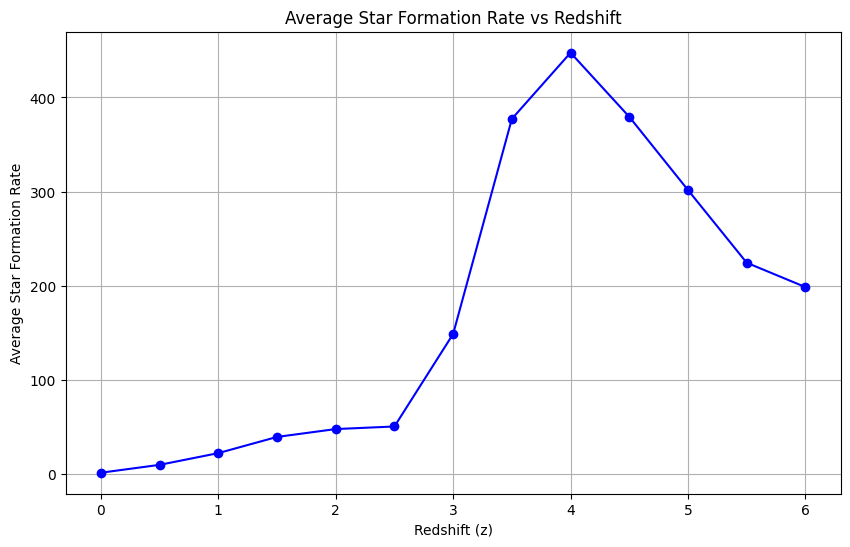

In [12]:
print(idNumbs)
#plotting sfr vs redshift =)
plt.figure(figsize=(10, 6))
plt.plot(redshifts, sfrData, marker='o', linestyle='-', color='blue')
plt.xlabel('Redshift (z)')
plt.ylabel('Average Star Formation Rate')
plt.title('Average Star Formation Rate vs Redshift')
plt.grid(True)
plt.show()

In [16]:
#merger stuff starts here
def get_data(path, params=None):
    # make HTTP GET request to path
    r2 = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r2.raise_for_status()

    if r2.headers['content-type'] == 'application/json':
        return r2.json() # parse json responses automatically

    # Change 'r.headers' to 'r2.headers'
    if 'content-disposition' in r2.headers:
        filename = r2.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r2.content)
        return filename # return the filename string

    return r2



In [23]:
sim2 = 'TNG100-1'


#this code is good but we need to vary the thingies
i = names.index("TNG100-1")
TNG100_info = r['simulations'][i]
TNG100 = get(TNG100_info['url'])
hubble = TNG100["hubble"]
snapshots = get(TNG100['snapshots'])
snap50_url = snapshots[50]['url']
snap50 = get(snap50_url)
subs = get(snap50['subhalos'], {'limit':11, 'order_by':'-mass_stars'} )
i = 7
print(subs['results'][i])
sub_url = subs['results'][i]['url']
#sub_url = "http://www.tng-project.org/api/%s/snapshots/%d/subhalos/%d/"%(sim2, snap_num, subid)

# Here I'm querying the particle ID and masses of blackholes in this subhalo
cutout_request = {'bhs':'ParticleIDs,Masses'}
cutout = get_data(sub_url+"cutout.hdf5", cutout_request)

with h5py.File(cutout,'r') as f:
    bhids = f['PartType5']['ParticleIDs'][:]
    bhmasses = f['PartType5']['Masses'][:] * 1e10/hubble

def search_mergers(mergers, bhid):
    mask = mergers['id1'] == bhid
    mask |= mergers['id2'] == bhid
    return mergers[mask]

#fetching merger file from google drive; THE FILE MUST BE DOWNLOADED AND IN YOUR DRIVE WITH THE NAME "TNG100_mergers_withID.npy" FOR THE FOLLOWING TO WORK (-jack)
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/'
tng100_mergers = np.load(data_dir + 'TNG100_mergers_withID.npy')

{'id': 0, 'sfr': 194.868, 'mass_log_msun': 14.00900037284869, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/50/subhalos/0/'}
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:

def searchMergers(mergers, bhid):
    mask = mergers['id1'] == bhid
    mask |= mergers['id2'] == bhid
    return mergers[mask]


#someone write a function here to grab the blackhole ids from a subhalo, im too tired and also i have a crapton of work left


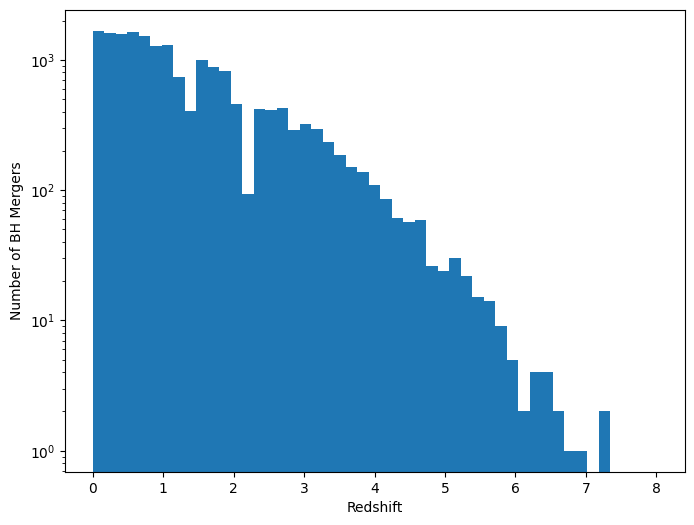

In [25]:
mergers = tng100_mergers #this says that the mergers we're parsing are from the file in the drive =)

#this is verbatim cici's plot; i think for the project we should narrow it down to specifically only include the mergers FROM THE SAMPLE OF SUBHALOS WE USED RATHER THAN THE GENERAL THING but my knowledge of python isn't good enough to implement that sort of filtration
fig = plt.figure(figsize=(8,6))
plt.hist(tng100_mergers['redshift'], bins = np.linspace(0,8,50))
plt.xlabel('Redshift')
plt.ylabel('Number of BH Mergers')
plt.yscale('log')
plt.show()
#cici: this is her code but I changed it to subhalo 0, u can change the id manually

In [ ]:
#cici: i didnt use this, but feel free to uncomment them
'''
mergerlist = []
mergerredshifts = []
for i in len(bhidlist): #the input here is a list of the blackhole ids from the list of subhalos or something
  bhid = bhidlist[i]
  mergers_thisbh = search_mergers(mergers=tng100_mergers, bhid)
  for merger in mergers_thisbh:
    mergerlist.append(1)
    mergerredshifts.append(merger['redshift']) #i think if we really wanted to do this, we could technically sort them into lists based on the value of redshifts they fall into, ie mergers from redshifts between, say, ±0.25 of a given redshift
'''